In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from view_transformer import view_transformer

In [3]:
cv2.namedWindow('photo', cv2.WINDOW_FULLSCREEN)
cv2.namedWindow('transformed', cv2.WINDOW_FULLSCREEN)
grid = cv2.imread('./photo.jpg')

# cv2.scatter(x_array, y_array, color='red')

# Определение координат точки (x, y)
source = np.array([(220, 150), (630, 120), (1140, 320), (650, 480)])
circle_color = (0, 0, 255)
circle_radius = 5

for center in source:
    # Рисование точки на изображении
    cv2.circle(img=grid, center=center, radius=circle_radius, color=circle_color, thickness=circle_radius)

SOURCE = source
TARGET_WIDTH = 400
TARGET_HEIGHT = 600
TARGET = np.array([
    [0, 0],
    [TARGET_WIDTH - 1, 0],
    [TARGET_WIDTH - 1, TARGET_HEIGHT - 1],
    [0, TARGET_HEIGHT - 1],
])

transformer = view_transformer(source=SOURCE, target=TARGET)

bounding_boxes = np.array([[600, 200, 700, 270]])
# print(f'bounding_boxes: {bounding_boxes}')
circle_color = (255, 0, 0)
for [x_1, y_1, x_2, y_2] in bounding_boxes:
    # Рисование точки на изображении
    cv2.rectangle(img=grid, pt1=(x_1, y_1), pt2=(x_2, y_2), color=(0, 255, 0), thickness=circle_radius)
    


points = np.array([[(x_1 + x_2) / 2, y]
                          for [x_1, _, x_2, y] in bounding_boxes]).astype('int')
print(f'Original points: {points}')
for center in points:
    # Рисование точки на изображении
    cv2.circle(img=grid, center=center, radius=circle_radius, color=circle_color, thickness=circle_radius)
points = transformer.transform_points(points=points).astype(int)
print(f'Transformed points: {points}')


cv2.imshow('photo', grid)

transformed = cv2.warpPerspective(grid, transformer.m, (TARGET_WIDTH, TARGET_HEIGHT), flags=cv2.INTER_LINEAR)
cv2.imshow('transformed', transformed)

while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

Original points: [[650 270]]
Transformed points: [[155 379]]


In [7]:
# cv2.namedWindow('photo', cv2.WINDOW_FULLSCREEN)
cv2.namedWindow('with_grid', cv2.WINDOW_FULLSCREEN)
img = cv2.imread('./photo.jpg')
grid = cv2.imread('./grid.png')
# cv2.scatter(x_array, y_array, color='red')

# Определение координат точки (x, y)
source = np.array([(220, 150), (630, 120), (1140, 320), (650, 480)])
circle_color = (0, 0, 255)
circle_radius = 5

# for center in source:
#     # Рисование точки на изображении
#     cv2.circle(img=grid, center=center, radius=circle_radius, color=circle_color, thickness=circle_radius)

SOURCE_WIDTH = 1500
SOURCE_HEIGHT = 1500
SOURCE = np.array([
    [0, 0],
    [SOURCE_WIDTH - 1, 0],
    [SOURCE_WIDTH - 1, SOURCE_HEIGHT - 1],
    [0, SOURCE_HEIGHT - 1],
])

TARGET_WIDTH = 1280
TARGET_HEIGHT = 720
TARGET = source

transformer = view_transformer(source=SOURCE, target=TARGET)
transformed = cv2.warpPerspective(grid, transformer.m, (TARGET_WIDTH, TARGET_HEIGHT), flags=cv2.INTER_LINEAR)
cv2.imshow('with_grid', transformed)

# # Настройка расположения переднего плана (foreground) на заднем плане (background)
# x = y = 0

# # Создание маски для прозрачных пикселей (альфа канал)
# mask = transformed[:, :, 3] / 255.0

# # Выполнение наложения
# output_image = cv2.seamlessClone(transformed, img, mask, (int(x), int(y)), cv2.NORMAL_CLONE)

alpha = 0.5  # Коэффициент прозрачности для наложения
output_image = cv2.addWeighted(img, alpha, transformed, 1 - alpha, 0)
cv2.imshow('with_grid', output_image)

while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [ ]:
alpha = 0.5  # Коэффициент прозрачности для наложения
output_image = cv2.addWeighted(img, alpha, transformed, 1 - alpha, 0)

In [ ]:
# Путь к исходным изображениям
img = cv2.imread('background.jpg')
transformed = cv2.imread('foreground.png')

# Проверка, что изображения загружены
if img is None or transformed is None:
    print("Не удалось загрузить изображение")
    exit()


# Настройка расположения переднего плана (foreground) на заднем плане (background)
x = y = 0

# Создание маски для прозрачных пикселей (альфа канал)
mask = transformed[:, :, 3] / 255.0

# Выполнение наложения
output_image = cv2.seamlessClone(transformed, img, mask, (int(x), int(y)), cv2.NORMAL_CLONE)

# Сохранение результата
cv2.imwrite('output.jpg', output_image)

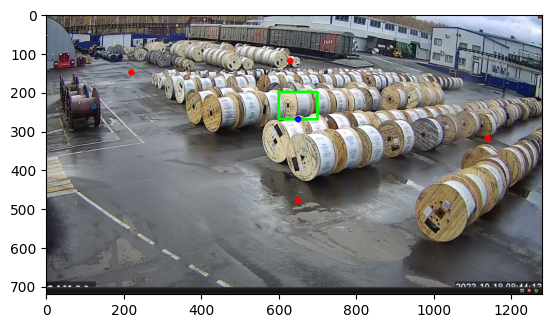

In [13]:
plt.imshow(cv2.cvtColor(grid, cv2.COLOR_BGR2RGB))

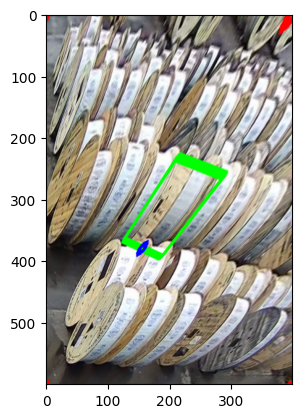

In [12]:
plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))